# Exploratory Data Analysis (EDA)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import glob
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Combining all csv files into one for EDA

df_list = []
comments_folder_path = '/content/drive/MyDrive/NLPMajorityLabels'

for f in glob.glob(comments_folder_path + "/*.csv"):
  df = pd.read_csv(f)
  df_list.append(df)

reds = pd.concat(df_list, ignore_index = True)
reds.describe()

Comment Score  Comment Depth  Created Timestamp
count   62232.000000   62232.000000       6.223200e+04
mean       14.799814       1.873216       1.608682e+09
std        74.177408       2.104704       4.262884e+07
min      -231.000000       0.000000       1.433398e+09
25%         1.000000       0.000000       1.586694e+09
50%         2.000000       1.000000       1.617729e+09
75%         6.000000       3.000000       1.622953e+09
max      3579.000000       9.000000       1.692860e+09

In [4]:
# Defining Preprocessing Functions
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_emoticons(text):
    # Remove emoticons using a regex pattern
    emoticon_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F700-\U0001F77F"  # alchemical symbols
                                  u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                  u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                  u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                  u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                  u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                  u"\U00002702-\U000027B0"  # Dingbats
                                  u"\U000024C2-\U0001F251"
                                  "]+", flags=re.UNICODE)

    return emoticon_pattern.sub(r'', text)

def lowercase_text(text):
    return text.lower()

def preProcess(df):
  df['Processed Comments'] = df['Comment Text'].apply(remove_special_characters)
  df['Processed Comments'] = df['Processed Comments'].apply(remove_stopwords)
  df['Processed Comments'] = df['Processed Comments'].apply(lemmatize_text)
  df['Processed Comments'] = df['Processed Comments'].apply(remove_emoticons)
  df['Processed Comments'] = df['Processed Comments'].apply(lowercase_text)

In [5]:
# Deleting unnecessary columns and pre-processing
del reds['Author']
del reds['Comment ID']
del reds['Semantic Label']
del reds['Semantic Label 2']
del reds['Semantic Label 3']
preProcess(reds)

In [6]:
reds['PWords'] = reds['Processed Comments'].str.split().str.len()
reds['PChars'] = reds['Processed Comments'].str.len()
reds['Words'] = reds['Comment Text'].str.split().str.len()
reds['Chars'] = reds['Comment Text'].str.len()
reds['Edited'] = np.where(reds['Edited']!='False', 'True', 'False')

del reds['Comment Text']
del reds['Processed Comments']
reds.head()

Comment Score  Comment Depth  Created Timestamp Edited Major_Semantic  \
0            729              0       1.663903e+09  False       negative   
1            292              0       1.663904e+09  False       positive   
2            237              0       1.663905e+09  False        neutral   
3             64              0       1.663905e+09  False        neutral   
4            169              0       1.663904e+09  False        neutral   

   PWords  PChars  Words  Chars  
0      14      75     28    132  
1       3      26      3     28  
2       1       8      2     13  
3       2      13      2     13  
4       5      26      9     43

In [14]:
reds["Created"] = pd.to_datetime(reds["Created Timestamp"], unit = 's')
reds["year"] = pd.DatetimeIndex(reds["Created"]).year
reds["month"] = pd.DatetimeIndex(reds["Created"]).month
del reds['Created Timestamp']
reds.describe()

Comment Score  Comment Depth        PWords          year         month
count   62232.000000   62232.000000  62232.000000  62232.000000  62232.000000
mean       14.799814       1.873216     14.394797   2020.522721      5.932430
std        74.177408       2.104704     26.495668      1.360174      2.952188
min      -231.000000       0.000000      0.000000   2015.000000      1.000000
25%         1.000000       0.000000      3.000000   2020.000000      4.000000
50%         2.000000       1.000000      7.000000   2021.000000      6.000000
75%         6.000000       3.000000     16.000000   2021.000000      8.000000
max      3579.000000       9.000000    818.000000   2023.000000     12.000000

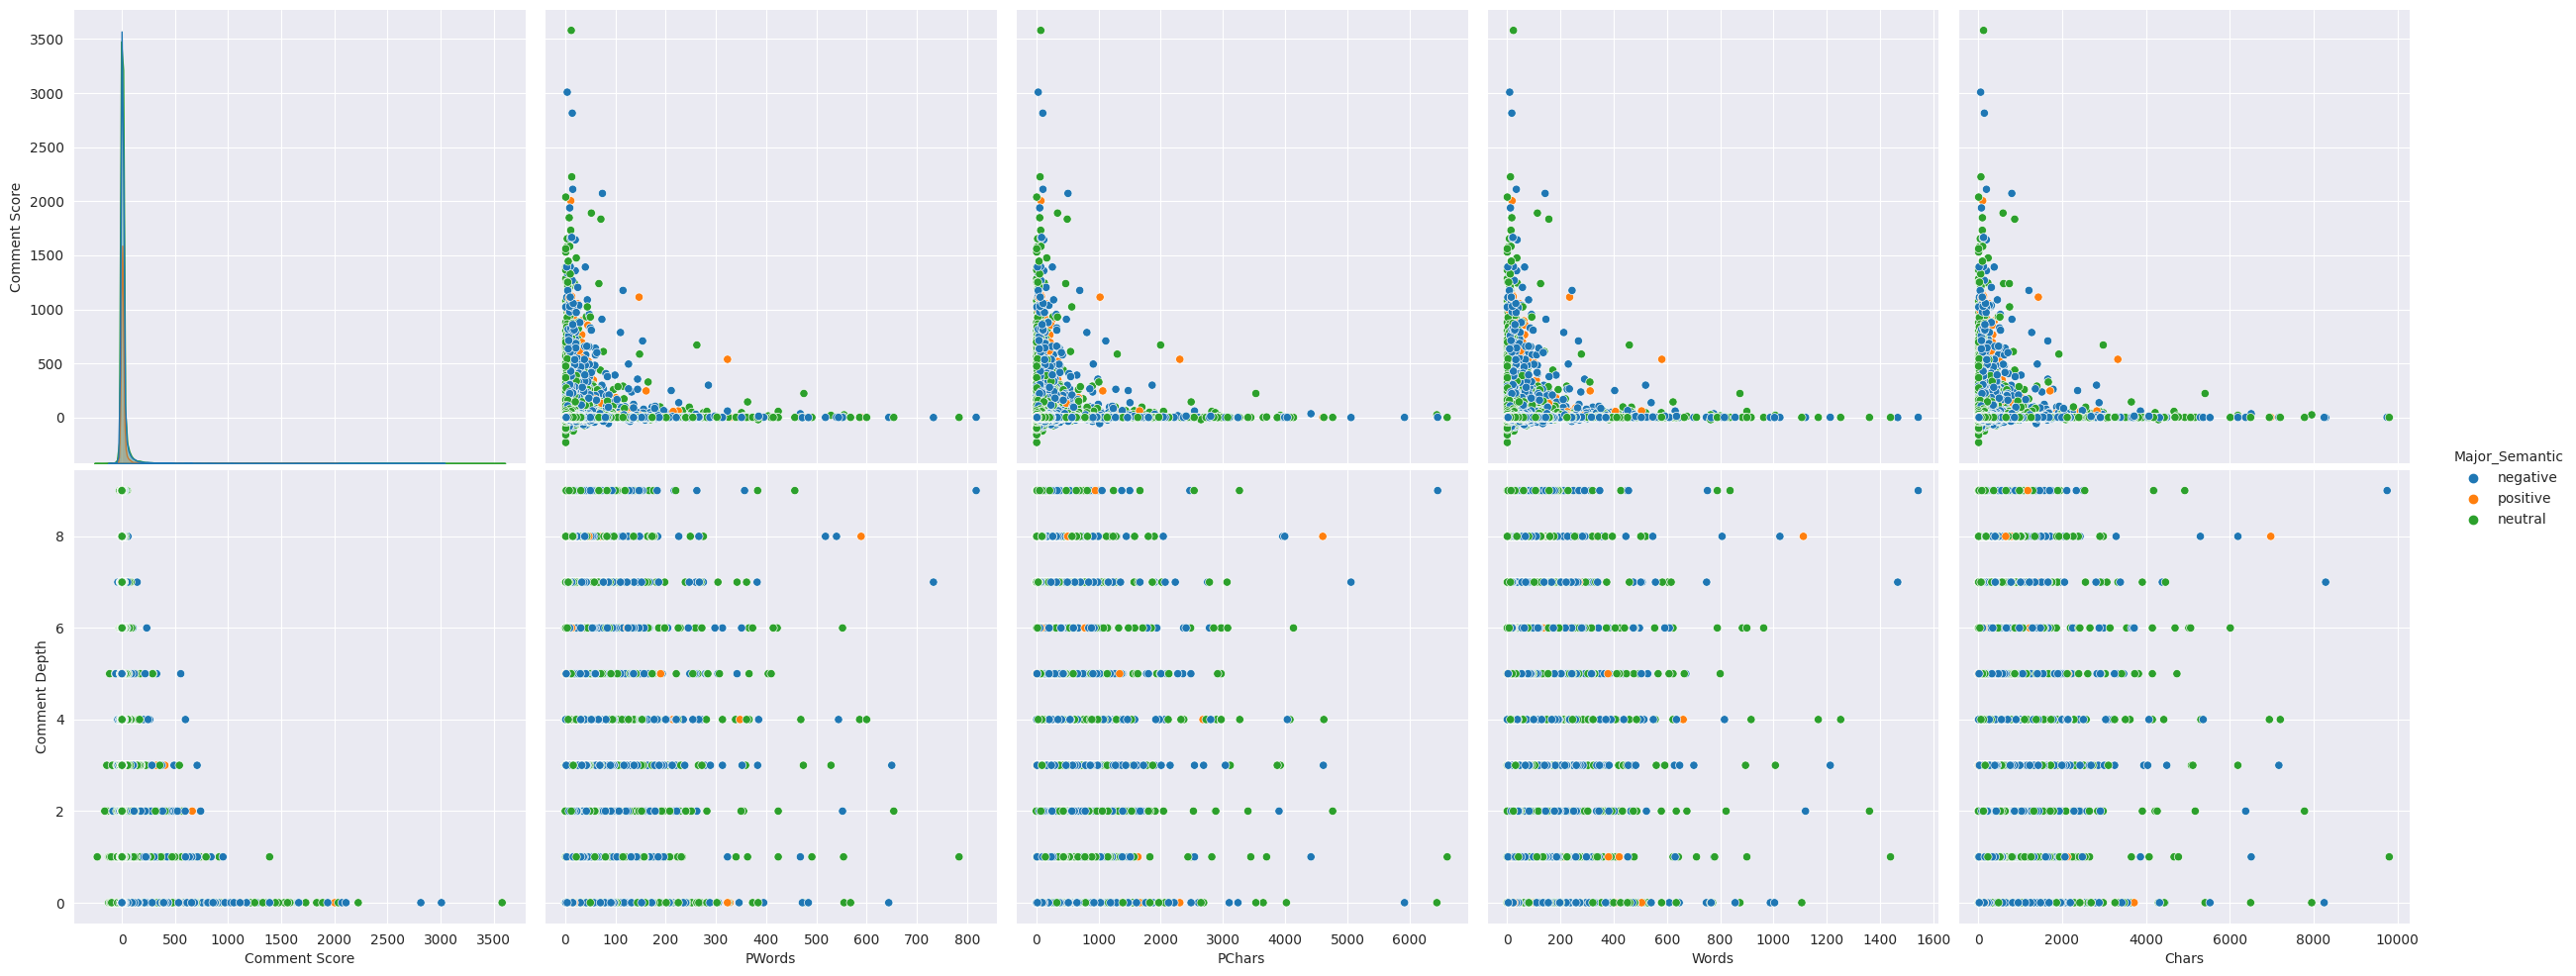

In [8]:
plt.close()
sns.set_style('darkgrid')
sns.pairplot(reds, x_vars = ["Comment Score", "PWords" , "PChars", "Words", "Chars"],
             y_vars = ["Comment Score", "Comment Depth"],
             hue = "Major_Semantic", size=5)
plt.show()

In [9]:
del reds['PChars']
del reds['Words']
del reds['Chars']
reds.head()

Comment Score  Comment Depth  Created Timestamp Edited Major_Semantic  \
0            729              0       1.663903e+09  False       negative   
1            292              0       1.663904e+09  False       positive   
2            237              0       1.663905e+09  False        neutral   
3             64              0       1.663905e+09  False        neutral   
4            169              0       1.663904e+09  False        neutral   

   PWords  
0      14  
1       3  
2       1  
3       2  
4       5

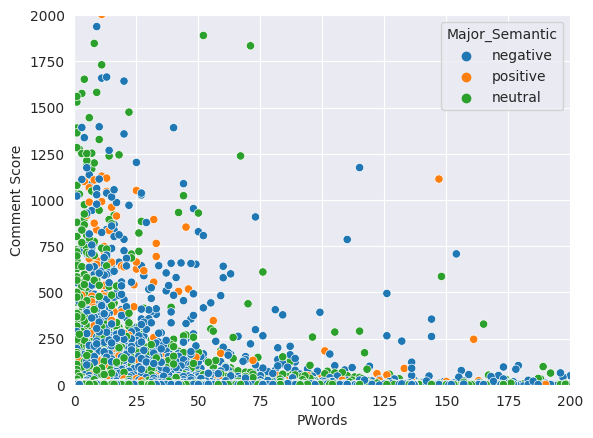

In [10]:
#PWords (0,200) -> Comment Score (0,1000)
g = sns.scatterplot(data = reds, x = "PWords", y = "Comment Score", hue = "Major_Semantic")
g.set_xlim(0, 200)
g.set_ylim(0, 2000)
plt.show()

In [16]:
# Filtering for Negative, Neutral and Positive Sentiment
neg = reds[reds.Major_Semantic=="negative"]
neu = reds[reds.Major_Semantic=="neutral"]
pos = reds[reds.Major_Semantic=="positive"]

Text(0.5, 0, 'Year')

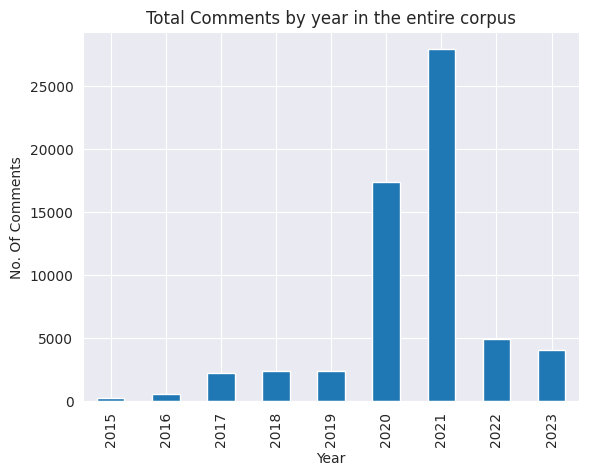

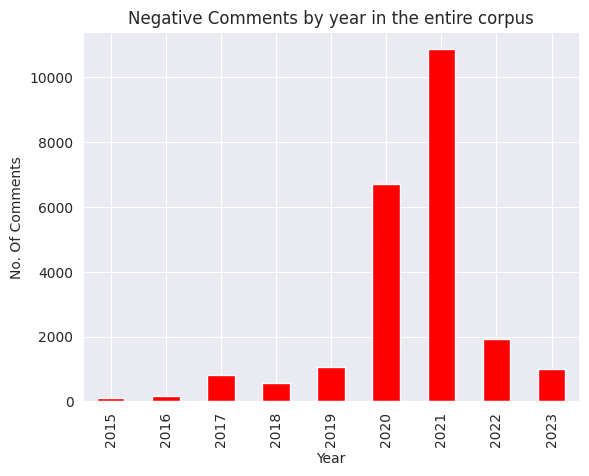

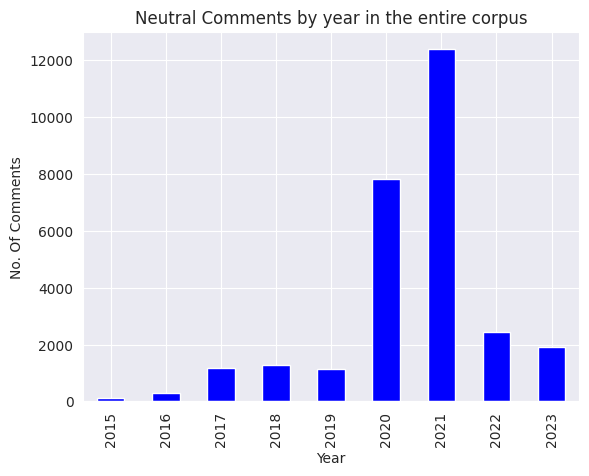

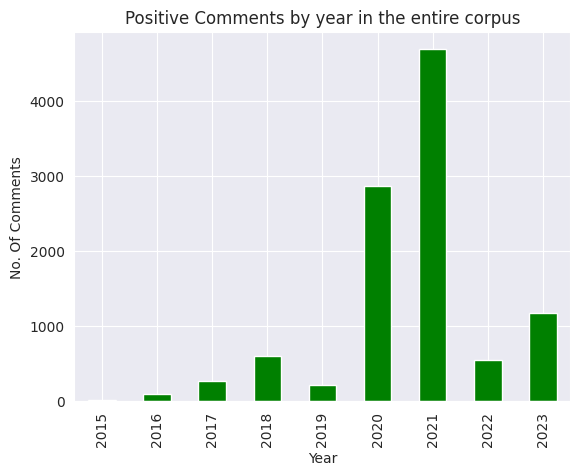

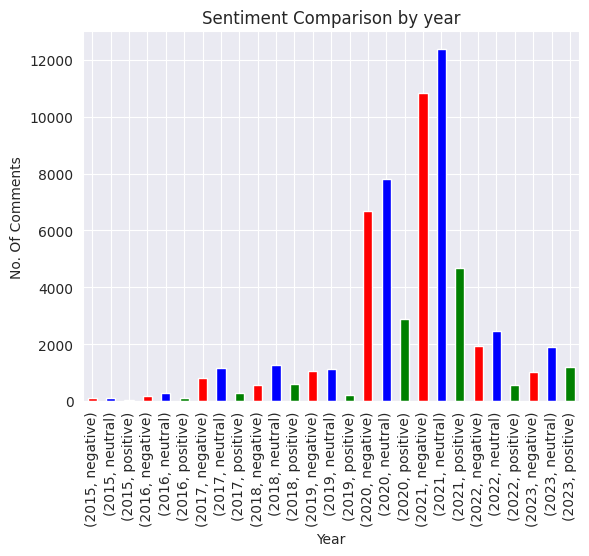

In [17]:
plt.figure()
reds['year'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Total Comments by year in the entire corpus")
plt.ylabel("No. Of Comments")
plt.xlabel("Year")

plt.figure()
neg['year'].value_counts().sort_index().plot(kind = 'bar', color = 'r')
plt.title("Negative Comments by year in the entire corpus")
plt.ylabel("No. Of Comments")
plt.xlabel("Year")

plt.figure()
neu['year'].value_counts().sort_index().plot(kind = 'bar', color = 'b')
plt.title("Neutral Comments by year in the entire corpus")
plt.ylabel("No. Of Comments")
plt.xlabel("Year")

plt.figure()
pos['year'].value_counts().sort_index().plot(kind = 'bar', color = 'g')
plt.title("Positive Comments by year in the entire corpus")
plt.ylabel("No. Of Comments")
plt.xlabel("Year")

plt.figure()
reds[['year', 'Major_Semantic' ]].value_counts().sort_index().plot(kind = 'bar', color = ['r', 'b', 'g'])
plt.title("Sentiment Comparison by year")
plt.ylabel("No. Of Comments")
plt.xlabel("Year")

Text(0.5, 0, 'Month')

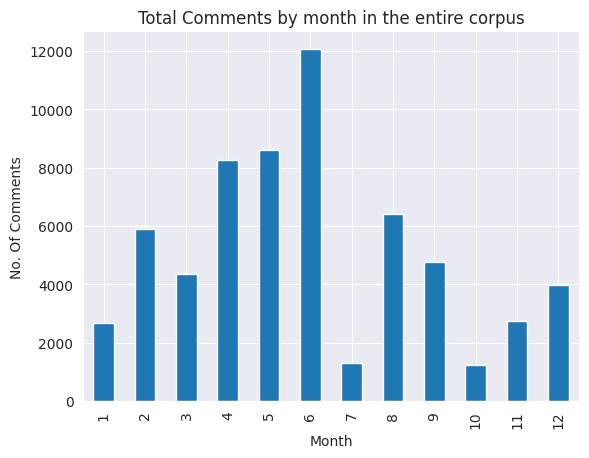

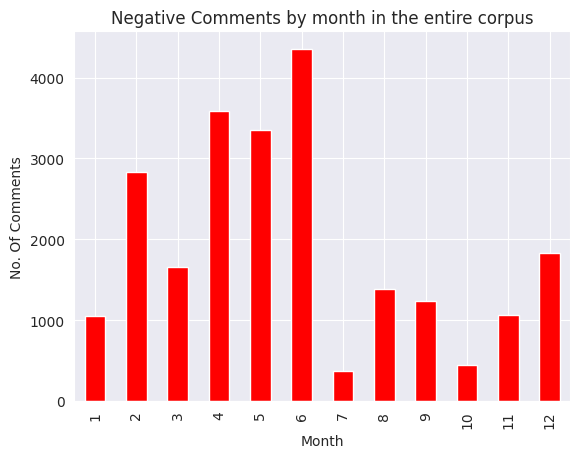

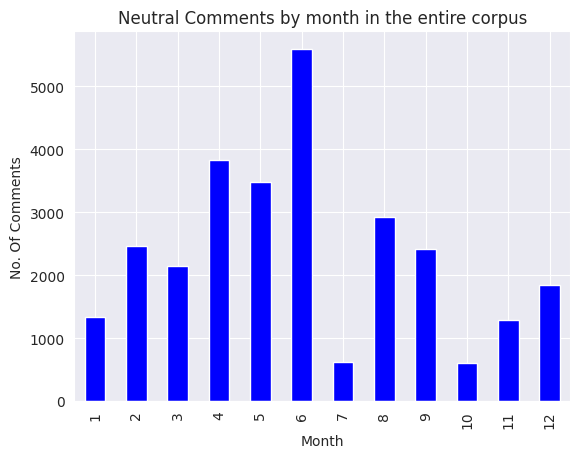

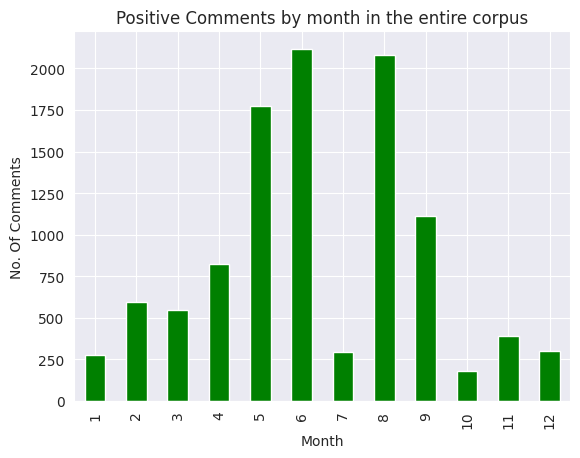

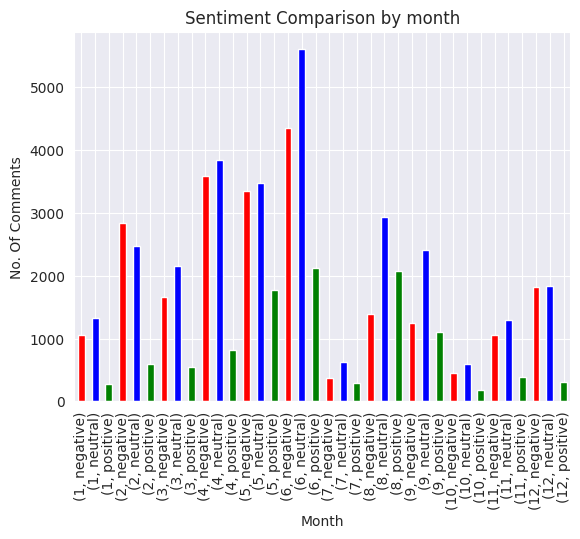

In [18]:
plt.figure()
reds['month'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Total Comments by month in the entire corpus")
plt.ylabel("No. Of Comments")
plt.xlabel("Month")

plt.figure()
neg[reds.Major_Semantic =="negative"]['month'].value_counts().sort_index().plot(kind = 'bar', color = 'r')
plt.title("Negative Comments by month in the entire corpus")
plt.ylabel("No. Of Comments")
plt.xlabel("Month")

plt.figure()
neu[reds.Major_Semantic =="neutral"]['month'].value_counts().sort_index().plot(kind = 'bar', color = 'b')
plt.title("Neutral Comments by month in the entire corpus")
plt.ylabel("No. Of Comments")
plt.xlabel("Month")

plt.figure()
pos[reds.Major_Semantic =="positive"]['month'].value_counts().sort_index().plot(kind = 'bar', color = 'g')
plt.title("Positive Comments by month in the entire corpus")
plt.ylabel("No. Of Comments")
plt.xlabel("Month")

plt.figure()
reds[['month', 'Major_Semantic' ]].value_counts().sort_index().plot(kind = 'bar', color = ['r', 'b', 'g'])
plt.title("Sentiment Comparison by month")
plt.ylabel("No. Of Comments")
plt.xlabel("Month")

Text(0.5, 0, 'Sentiment')

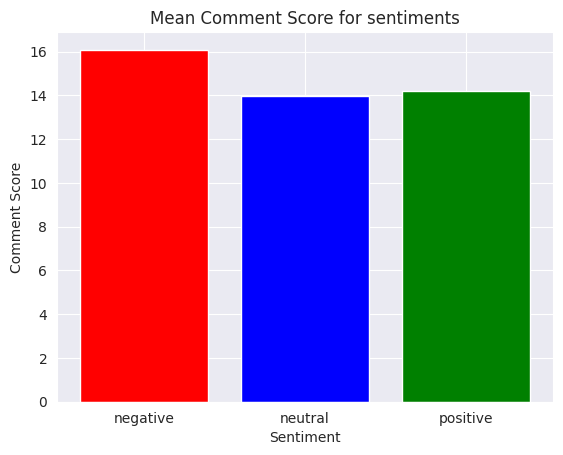

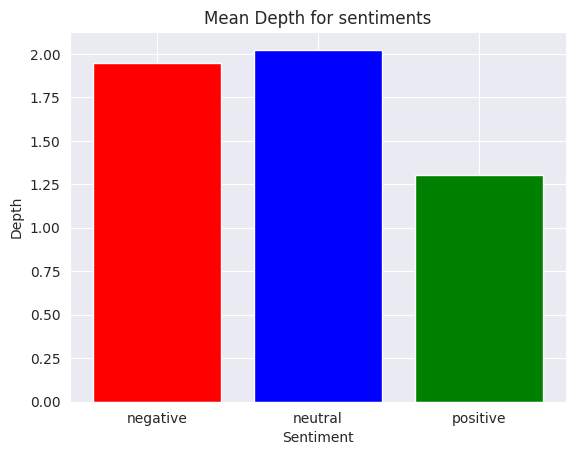

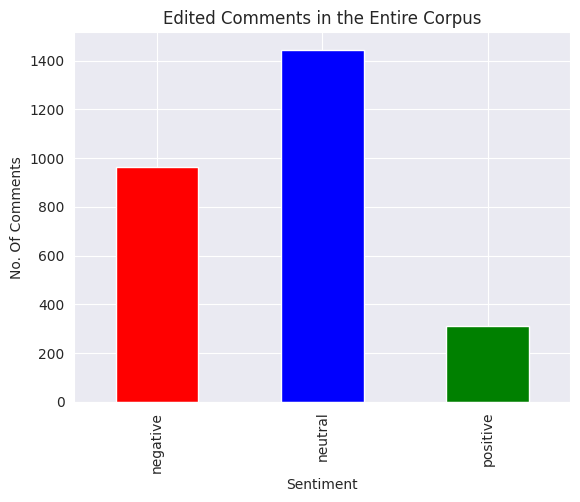

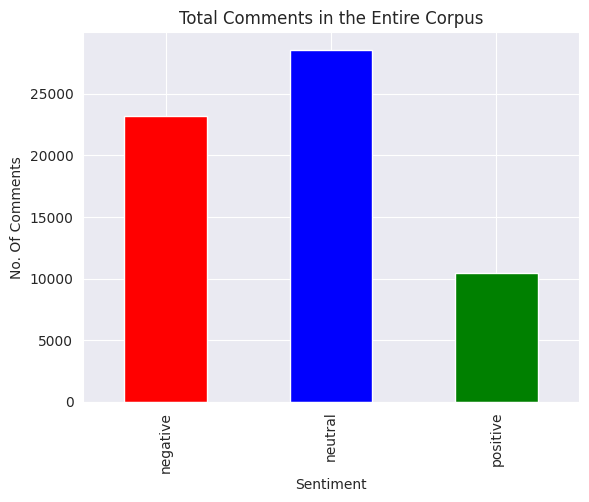

In [23]:
x = ['negative', 'neutral', 'positive']
score = [neg['Comment Score'].mean(), neu['Comment Score'].mean(), pos['Comment Score'].mean()]
depth = [neg['Comment Depth'].mean(), neu['Comment Depth'].mean(), pos['Comment Depth'].mean()]

plt.figure()
plt.bar(x, score, color = ['r', 'b', 'g'])
plt.title("Mean Comment Score for sentiments")
plt.ylabel("Comment Score")
plt.xlabel("Sentiment")

plt.figure()
plt.bar(x, depth, color = ['r', 'b', 'g'])
plt.title("Mean Depth for sentiments")
plt.ylabel("Depth")
plt.xlabel("Sentiment")

plt.figure()
reds[reds.Edited == "True"]['Major_Semantic'].value_counts().sort_index().plot(kind = 'bar', color = ['r', 'b', 'g'])
plt.title("Edited Comments in the Entire Corpus")
plt.ylabel("No. Of Comments")
plt.xlabel("Sentiment")

plt.figure()
reds['Major_Semantic'].value_counts().sort_index().plot(kind = 'bar', color = ['r', 'b', 'g'])
plt.title("Total Comments in the Entire Corpus")
plt.ylabel("No. Of Comments")
plt.xlabel("Sentiment")

Text(0.5, 0, 'Sentiment')

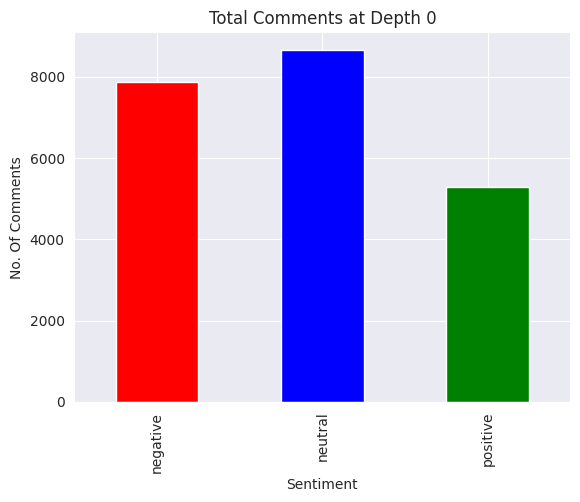

In [29]:
plt.figure()
reds[reds["Comment Depth"]==0]['Major_Semantic'].value_counts().sort_index().plot(kind = 'bar', color = ['r', 'b', 'g'])
plt.title("Total Comments at Depth 0")
plt.ylabel("No. Of Comments")
plt.xlabel("Sentiment")

Text(0, 0.5, 'No. of Comments')

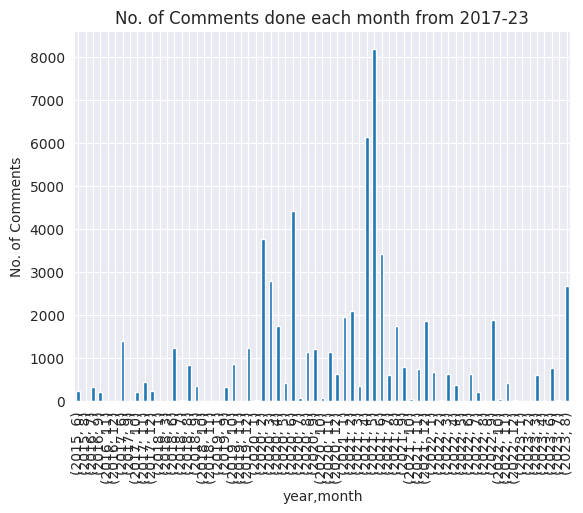

In [20]:
plt.figure()
reds[['year' , 'month']].value_counts().sort_index().plot(kind = 'bar')
plt.title("No. of Comments done each month from 2017-23")
plt.ylabel("No. of Comments")

<Axes: xlabel='Created', ylabel='Comment Score'>

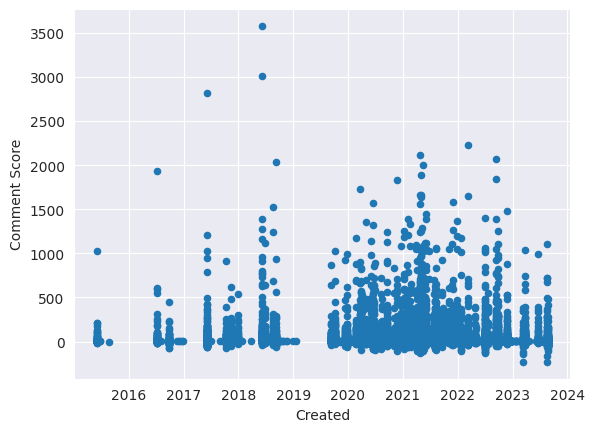

In [21]:
reds.plot(x = 'Created', y = 'Comment Score', kind = 'scatter')

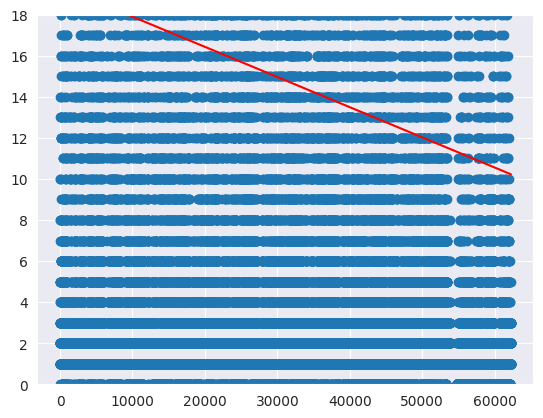

In [24]:
a, b = np.polyfit(reds.index, reds["Comment Score"], 1)
plt.scatter(reds.index, reds["Comment Score"])
plt.plot(reds.index, a*reds.index+b, color = 'r')
plt.ylim([0, 18])
plt.show()

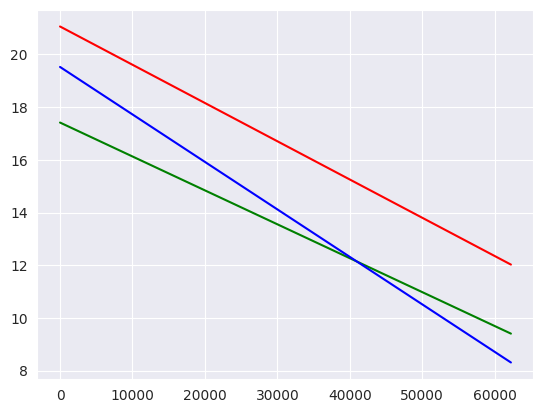

In [25]:
a, b = np.polyfit(neg.index, neg["Comment Score"], 1)
c, d = np.polyfit(pos.index, pos["Comment Score"], 1)
e, f = np.polyfit(neu.index, neu["Comment Score"], 1)
plt.plot(neg.index, a*neg.index+b, color = 'r')
plt.plot(pos.index, c*pos.index+d, color = 'g')
plt.plot(neu.index, e*neu.index+f, color = 'b')

In [30]:
reds[reds["Comment Depth"]==0]['Major_Semantic'].value_counts()

neutral     8662
negative    7861
positive    5295
Name: Major_Semantic, dtype: int64